<a href="https://colab.research.google.com/github/Ahmad-Mohamed-Sharaf/zoomcamp/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import os
from tensorflow.keras.utils import load_img
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 15.38 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (3783/3783), done.
/content/clothing-dataset-small


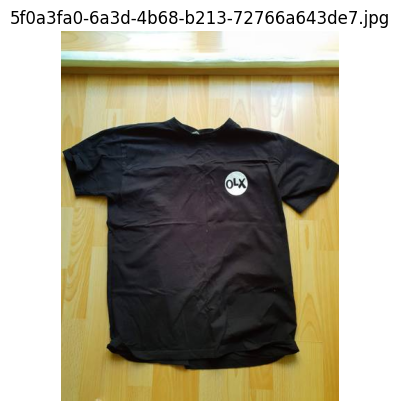

In [ ]:
# Clone the project from GitHub
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

# Navigate to the folder after cloning
%cd /content/clothing-dataset-small

# Select a random image from the t-shirt folder
img_name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
img_path = f'./train/t-shirt/{img_name}'

# Load and display the image
img = load_img(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(img_name)
plt.show()


In [ ]:
fullname = img_path

img = load_img(fullname, target_size=(299, 299))


In [ ]:
print(img)


<PIL.Image.Image image mode=RGB size=299x299 at 0x78D6D7BB4AD0>


array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]], dtype=uint8)
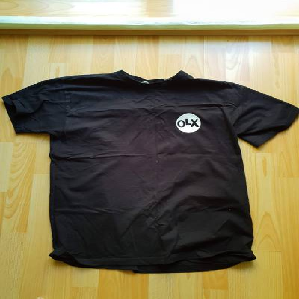

In [ ]:
x = np.array(img)
x

In [ ]:
x.shape

(299, 299, 3)

use xception model

In [ ]:
model = Xception(
    weights="imagenet",
    input_shape=(299, 299, 3)
)

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [ ]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [ ]:
pred.shape


(1, 1000)

In [ ]:
pred

array([[3.23711836e-04, 1.57383591e-04, 2.13492880e-04, 1.52370281e-04,
        2.47625838e-04, 3.05035559e-04, 3.20591673e-04, 1.47499086e-04,
        2.03621545e-04, 1.49272208e-04, 1.95662607e-04, 2.10137077e-04,
        7.59263858e-05, 1.13972041e-04, 1.62683296e-04, 2.04638316e-04,
        1.97415677e-04, 1.44288526e-04, 1.40217293e-04, 1.73685708e-04,
        7.46689271e-04, 2.56966392e-04, 2.66808463e-04, 2.96513783e-04,
        3.73601768e-04, 2.77403975e-04, 2.16570523e-04, 2.27269804e-04,
        3.80812591e-04, 1.72165688e-04, 3.05400725e-04, 1.96431050e-04,
        3.92114598e-04, 4.78070957e-04, 2.91751028e-04, 3.25693021e-04,
        1.47395025e-04, 1.62361830e-04, 2.12710453e-04, 1.34028072e-04,
        2.40070149e-04, 6.75210846e-04, 2.54943065e-04, 1.44478545e-04,
        4.12820926e-04, 2.04408367e-04, 3.02957895e-04, 1.49339408e-04,
        1.99653441e-04, 2.27005512e-04, 2.93728866e-04, 2.27444340e-04,
        6.37643505e-04, 7.82614225e-04, 2.49556906e-04, 4.052702

In [ ]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n03595614', 'jersey', np.float32(0.68196356)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038139977)),
  ('n04370456', 'sweatshirt', np.float32(0.034324735)),
  ('n03710637', 'maillot', np.float32(0.011354207)),
  ('n04525038', 'velvet', np.float32(0.0018453562))]]

In real this image is a t-shirt, but ImageNet is not very good when it comes to clothes detection.

Read and Preprocess training Data


In [ ]:

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    '/content/clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [ ]:
train_ds.class_indices


{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
%cd /content

/content


In [ ]:
!ls clothing-dataset-small/train


dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt


In [ ]:
next(train_ds)


(array([[[[-0.01960784, -0.08235294, -0.16862744],
          [ 0.09803927,  0.03529418, -0.05098039],
          [ 0.09803927,  0.03529418, -0.05098039],
          ...,
          [ 0.6392157 ,  0.58431375,  0.5058824 ],
          [ 0.6627451 ,  0.60784316,  0.5294118 ],
          [ 0.6627451 ,  0.60784316,  0.5294118 ]],
 
         [[-0.27058822, -0.3333333 , -0.41960782],
          [ 0.18431377,  0.12156868,  0.03529418],
          [ 0.03529418, -0.02745098, -0.11372548],
          ...,
          [ 0.54509807,  0.4901961 ,  0.41176474],
          [ 0.654902  ,  0.6       ,  0.52156866],
          [ 0.5372549 ,  0.48235297,  0.4039216 ]],
 
         [[ 0.16078436,  0.09803927,  0.01176476],
          [-0.16862744, -0.23137254, -0.31764704],
          [-0.12941176, -0.19215685, -0.27843136],
          ...,
          [ 0.60784316,  0.5529412 ,  0.47450984],
          [ 0.5294118 ,  0.47450984,  0.39607847],
          [ 0.5686275 ,  0.5137255 ,  0.43529415]],
 
         ...,
 
         [[-

In [ ]:
X, y = next(train_ds)

In [ ]:
X

array([[[[ 0.13725495, -0.12156862, -0.38039213],
         [ 0.1686275 , -0.09019607, -0.3490196 ],
         [ 0.18431377, -0.0745098 , -0.3333333 ],
         ...,
         [ 0.27058828, -0.00392157, -0.23921567],
         [ 0.10588241, -0.16862744, -0.40392154],
         [ 0.15294123, -0.12156862, -0.35686272]],

        [[ 0.20000005, -0.05882353, -0.31764704],
         [ 0.21568632, -0.04313725, -0.30196077],
         [ 0.22352946, -0.03529412, -0.29411763],
         ...,
         [ 0.36470592,  0.09019613, -0.14509803],
         [ 0.16078436, -0.11372548, -0.3490196 ],
         [ 0.14509809, -0.12941176, -0.36470586]],

        [[ 0.22352946, -0.03529412, -0.29411763],
         [ 0.21568632, -0.04313725, -0.30196077],
         [ 0.20784318, -0.05098039, -0.3098039 ],
         ...,
         [ 0.427451  ,  0.15294123, -0.08235294],
         [ 0.27058828, -0.00392157, -0.23921567],
         [ 0.15294123, -0.12156862, -0.35686272]],

        ...,

        [[ 0.24705887,  0.02745104, -0

In [ ]:
X.shape

(32, 150, 150, 3)

In [ ]:
train_ds.class_indices


{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
y[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Read and Preprocess Validation Data


In [ ]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [ ]:
train_ds

Collect Full Training Data into NumPy Arrays

In [ ]:
X_all = []
y_all = []

for X_batch, y_batch in train_ds:
    X_all.append(X_batch)
    y_all.append(y_batch)

    if len(X_all) * train_ds.batch_size >= train_ds.samples:
        break

X_all = np.concatenate(X_all)
y_all = np.concatenate(y_all)

print("shape of X_all:", X_all.shape)
print("shape of y_all:", y_all.shape)


shape of X_all: (3068, 150, 150, 3)
shape of y_all: (3068, 10)


Train Xception on smaller images

In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Getting Feature map Using the Base Model


In [ ]:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs)
outputs = base
model = keras.Model(inputs, outputs)
preds = model.predict(X)

preds.shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


(32, 5, 5, 2048)

Converting Feature Maps to Vectors with Global Average Pooling

In [ ]:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)
outputs = vectors

model = keras.Model(inputs, outputs)
preds = model.predict(X)

preds.shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(32, 2048)

Building the Classification Layer

In [ ]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

preds = model.predict(X)
preds.shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


(32, 10)

prediction for random image

In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

preds = model.predict(X)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


(32, 10)

In [ ]:
preds[0]

array([-0.38343728,  0.0044297 , -0.340872  , -0.39861095,  0.20758826,
       -1.3773937 , -0.67379665,  0.07285699, -2.2716904 , -0.33114502],
      dtype=float32)

the model outputs here just random numbers because we haven’t trained the model yet

model training

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=10, validation_data=val_ds)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 211ms/step - accuracy: 0.5993 - loss: 1.4634 - val_accuracy: 0.7155 - val_loss: 1.1378
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8314 - loss: 0.5303 - val_accuracy: 0.7859 - val_loss: 0.8576
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.8806 - loss: 0.3420 - val_accuracy: 0.7918 - val_loss: 0.9584
Epoch 4/10
32/96 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9183 - loss: 0.2130

KeyboardInterrupt: 

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)


In [ ]:
history.history['accuracy']
#history.history['val_accuracy']

In [ ]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

learning rate

In [ ]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
learning_rate = 0.001

checkpointing

In [ ]:
model.save_weights('model_v1.h5', save_format='h5')


In [ ]:
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=3, val_accuracy=0.84)


In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Different Dense Layer Sizes to Improve Model Accuracy

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model


In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()


In [ ]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks(np.arange(0.64, 0.87, 0.02))
plt.legend()

dropout

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()


In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

In [ ]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()

data augmentation

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)


In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

Train a 299×299 model

Model Architecture

In [ ]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

Image Input Size

In [ ]:
input_size = 299

Data Generators for Training (with Augmentation) and Validation



In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds =  val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


Checkpoint Callback

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

Training the Xception Model (299×299)

In [ ]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.5658 - loss: 1.3829

96/96 ━━━━━━━━━━━━━━━━━━━━ 91s 861ms/step - accuracy: 0.5671 - loss: 1.3789 - val_accuracy: 0.8358 - val_loss: 0.5393
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 748ms/step - accuracy: 0.8155 - loss: 0.5424

96/96 ━━━━━━━━━━━━━━━━━━━━ 130s 779ms/step - accuracy: 0.8156 - loss: 0.5421 - val_accuracy: 0.8768 - val_loss: 0.4437
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 752ms/step - accuracy: 0.8494 - loss: 0.4156 - val_accuracy: 0.8739 - val_loss: 0.3841
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 777ms/step - accuracy: 0.8594 - loss: 0.3908 - val_accuracy: 0.8534 - val_loss: 0.3890
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 765ms/step - accuracy: 0.8841 - loss: 0.3501 - val_accuracy: 0.8710 - val_loss: 0.3648
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 742ms/step - accuracy: 0.8972 - loss: 0.2945

96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 774ms/step - accuracy: 0.8971 - loss: 0.2947 - val_accuracy: 0.8798 - val_loss: 0.3571
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 766ms/step - accuracy: 0.9098 - loss: 0.2828 - val_accuracy: 0.8798 - val_loss: 0.3492
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 801ms/step - accuracy: 0.9194 - loss: 0.2526 - val_accuracy: 0.8798 - val_loss: 0.3634
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 795ms/step - accuracy: 0.9209 - loss: 0.2401 - val_accuracy: 0.8739 - val_loss: 0.3489
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 753ms/step - accuracy: 0.9181 - loss: 0.2348

96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 785ms/step - accuracy: 0.9181 - loss: 0.2349 - val_accuracy: 0.8827 - val_loss: 0.3641
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 82s 783ms/step - accuracy: 0.9212 - loss: 0.2296 - val_accuracy: 0.8739 - val_loss: 0.3556
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 787ms/step - accuracy: 0.9253 - loss: 0.2081 - val_accuracy: 0.8739 - val_loss: 0.3526
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 787ms/step - accuracy: 0.9410 - loss: 0.1871 - val_accuracy: 0.8798 - val_loss: 0.3527
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 779ms/step - accuracy: 0.9462 - loss: 0.1698 - val_accuracy: 0.8798 - val_loss: 0.3662
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 782ms/step - accuracy: 0.9340 - loss: 0.1909 - val_accuracy: 0.8768 - val_loss: 0.3726
Epoch 16/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 800ms/step - accuracy: 0.9464 - loss: 0.1609 - val_accuracy: 0.8827 - val_loss: 0.3728
Epoch 17/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.9452 - loss: 0.1682

96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 795ms/step - accuracy: 0.9452 - loss: 0.1682 - val_accuracy: 0.8915 - val_loss: 0.3623
Epoch 18/50
39/96 ━━━━━━━━━━━━━━━━━━━━ 41s 734ms/step - accuracy: 0.9500 - loss: 0.1750

Using the model

Loading the model

In [ ]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

In [ ]:
import os

for filename in os.listdir():
    if filename.endswith(".h5"):
        print(filename)


In [ ]:
model = keras.models.load_model('xception_v4_1_16_0.897.h5')

In [ ]:
model.evaluate(test_ds)

Getting predictions

In [ ]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

img = load_img(path, target_size=(299, 299))

x = np.array(img)
X = np.array([x])
X.shape



In [ ]:
X = preprocess_input(X)
pred = model.predict(X)

In [ ]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

dict(zip(classes, pred[0]))

In [ ]:
classes[np.argmax(pred[0])]


softmax

In [ ]:
probs = tf.nn.softmax(pred[0]).numpy()
dict(zip(classes, probs))

In [ ]:
# Determine the highest probability after softmax
max_prob_class = classes[np.argmax(probs)]  # The class with the highest probability
max_prob = np.max(probs)  # Highest probability

# Print the result
print(f"The highest probability after softmax is: {max_prob_class} with probability: {max_prob:.4f}")


In [ ]:
print(img)

In [ ]:
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()